In [1]:
import sys
import localSettings as ls
print(ls.main_path)

/home/david/data/searchingfornues/v08_00_00_33/cc0pinp/0320/


In [2]:
main_path = ls.main_path
sys.path.append(main_path)

In [3]:
from datetime import datetime
now = datetime.now()
date_time = now.strftime("%m%d%Y")
print("date and time:",date_time)

date and time: 03292020


In [4]:
NUE = False
PI0 = True
NUMU = False
CCmuCPiNoPi0 = False
CCmuNoPi = False
NCNoPi = False
NCcPiNoPi0 = False

In [5]:
SAMPLE = r'$\nu_e$'
SAMPLEDEF = 'nue'
if (PI0):
    SAMPLE = r"$\pi^0$"
    SAMPLEDEF = 'pi0'
if (NUMU):
    SAMPLE = r'$\nu_{\mu}$'
    SAMPLEDEF = 'numu'
if (CCmuCPiNoPi0):
    SAMPLE = r'$\nu_{\mu}$ CC $\pi$ no $\pi^0$'
    SAMPLEDEF = 'CCmuCPiNoPi0'
if (CCmuNoPi):
    SAMPLE = r'$\nu_{\mu}$ CC no $\pi$'
    SAMPLEDEF = 'CCmuNoPi'
if (NCNoPi):
    SAMPLE = r'$\nu_{\mu}$ NC no $\pi$'
    SAMPLEDEF = 'NCNoPi'
if (NCcPiNoPi0):
    SAMPLE = r'$\nu_{\mu}$ NC $\pi$ no $\pi^0$'
    SAMPLEDEF = 'NCcPiNoPi0'
SAMPLE += ' sample'

In [6]:
USEBDT = False

In [28]:
NUEVARIABLES = True

In [8]:
SAVEFIG = False

In [9]:
import plotter
import importlib
importlib.reload(plotter)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
import pandas as pd

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

In [10]:
variables = [
    "shr_dedx_Y", "shr_bkt_pdg","shr_bkt_purity", "p", "pt", "selected", "nu_pdg", "shr_theta",
    "slpdg", "trk_score_v", "backtracked_pdg", # modified from shr_score_v
    "shr_pfp_id_v", "category",
    "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
    "shr_tkfit_gap10_dedx_U","shr_tkfit_gap10_dedx_V","shr_tkfit_gap10_dedx_Y",
    "shr_tkfit_2cm_dedx_U","shr_tkfit_2cm_dedx_V","shr_tkfit_2cm_dedx_Y",
    "topological_score",
    #"shr_energy_tot", 
    "trk_energy_tot", "shr_hits_tot", "ccnc", "trk_chipr",
    "trk_bkt_pdg", "trk_bkt_purity","hits_ratio", "n_tracks_contained", 
    #"crtveto","crthitpe","_closestNuCosmicDist",
    "NeutrinoEnergy2",
    "ccnc","flash_pe",
    #"run","sub","evt",
    "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
    "nu_flashmatch_score","best_cosmic_flashmatch_score","best_obviouscosmic_flashmatch_score",
    #"trk_pfp_id",
    "true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z",
    "shrmoliereavg","shrmoliererms",
    "shr_tkfit_npointsvalid","shr_tkfit_npoints", # fitted vs. all hits for shower
    "shrclusfrac0","shrclusfrac1","shrclusfrac2", # track-fitted hits / all hits
    "trkshrhitdist2", # "trkshrhitdist0","trkshrhitdist1", distance between track and shower in 2D
    "shrsubclusters0","shrsubclusters1","shrsubclusters2", # number of sub-clusters in shower
    "trk_llr_pid_score_v", # trk-PID score
    "trk_energy_proton_v", # track energy under proton hyp
    "trk_calo_energy_y_v", # track calo energy
    #"pi0_energy2_Y", # pi0 tagger variables
    "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
    "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
    "nproton", "nu_e", "n_showers_contained", "shr_distance", "trk_distance","proton_e","elec_e",
    "hits_y", "shr_pz", "shr_energy", "shr_dedx_U", "shr_dedx_V", "shr_phi", "trk_phi", "trk_theta",
    "shr_tkfit_dedx_U", "shr_tkfit_dedx_V", "run", "sub", "evt", "trk_pid_chipr_v",
    "trk_len", "mc_pdg", "slnunhits", "slnhits", "shr_score", "trk_score", "trk_hits_tot",
    "true_e_visible", "matched_E", "shr_bkt_E", "trk_bkt_E", "trk_energy", "tksh_distance", "tksh_angle",
    "npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
    "pi0_e", "shr_energy_tot_cali", "shr_dedx_Y_cali", "evnunhits", "nslice", "interaction",
    "slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z","contained_fraction",
    "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","secondshower_Y_dir","shrclusdir2",
    "shr_tkfit_nhits_Y","shr_tkfit_nhits_U","shr_tkfit_nhits_V",
    "shr_tkfit_2cm_nhits_Y","shr_tkfit_2cm_nhits_U","shr_tkfit_2cm_nhits_V",
    "shr_tkfit_gap10_nhits_Y","shr_tkfit_gap10_nhits_U","shr_tkfit_gap10_nhits_V",
    "weightSpline","weightSplineTimesTune","weightTune",
    # pi0 variables
    "pi0_radlen1","pi0_radlen2","pi0_dot1","pi0_dot2","pi0_energy1_Y","pi0_energy2_Y",
    "pi0_dedx1_fit_Y","pi0_dedx2_fit_Y","pi0_shrscore1","pi0_shrscore2","pi0_gammadot",
    "pi0_dedx1_fit_V","pi0_dedx2_fit_V","pi0_dedx1_fit_U","pi0_dedx2_fit_U",
    "pi0_mass_Y","pi0_mass_V","pi0_mass_U",
    "pi0_dir2_x","pi0_dir2_y","pi0_dir2_z","pi0_dir1_x","pi0_dir1_y","pi0_dir1_z",
    # truth variables
    "isVtxInFiducial","truthFiducial"
]

In [11]:
# variables to be trained on
TRAINVAR = ["shr_score","tksh_distance","tksh_angle",
            "shr_tkfit_dedx_max",
            "trkfit","trkpid",
            "subcluster","shrmoliereavg",
            "trkshrhitdist2","hits_ratio",
            "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","anglediff_Y",
            "CosmicIPAll3D","CosmicDirAll3D"]

BDT_LABELS =  ['pi0','nonpi0']

In [12]:
def SliceQuery(APP):
    return 'nslice_%s == 1'%APP

In [13]:
# Pi0 Selection

# pi0 selection
LOOSE = False
if (LOOSE):
    SCORECUT = 0.8 # 0.75 #75 # max track score
    DVTX = 3.0 # 3. # distance from vertex of each shower
    VTXDOT = 0.8 # dot product between each shower's direction and the vtx -> shr start vector
    EMIN1 =  50. # leading photon min energy
    EMIN2 =  20. #20. # 20. # subleading photon min energy
    GAMMADOT = 0.94 # max dot product between showres
    DEDXCUT = 0.0 # MeV/cm cut on leading shower only
else:
    SCORECUT = 0.5 # 0.75 #75 # max track score
    DVTX = 3.0 # 3. # distance from vertex of each shower
    VTXDOT = 0.8 # dot product between each shower's direction and the vtx -> shr start vector
    EMIN1 =  60. # leading photon min energy
    EMIN2 =  40. #20. # 20. # subleading photon min energy
    GAMMADOT = 0.94 # max dot product between showres
    DEDXCUT = 1.0 # MeV/cm cut on leading shower only

CUT_VAR_V = ["nslice","pi0_shrscore1","pi0_shrscore2","pi0_dot1","pi0_dot2",\
            "pi0_radlen1","pi0_radlen2","pi0_gammadot","pi0_energy1_Y","pi0_energy2_Y",\
            "pi0_dedx1_fit_Y","n_showers_contained"]
CUT_VAL_V = [" == 1"," < %f"%SCORECUT," < %f"%SCORECUT," > %f"%VTXDOT," > %f"%VTXDOT,\
            " > %f"%DVTX," > %f"%DVTX," < %f"%GAMMADOT," > %f"%EMIN1," > %f"%EMIN2,\
            ">= %f"%DEDXCUT," != 0"]

def Pi0Query(APP):

    QUERY = ""
    
    for i,v in enumerate(CUT_VAR_V):
        if (i == 0):
            QUERY  += '%s_%s %s'%(v,APP,CUT_VAL_V[i])
        else:
            QUERY  += ' and %s_%s %s'%(v,APP,CUT_VAL_V[i])   
            
    return QUERY

In [14]:
def NpBoxCutQuery(APP,BDT=False):
    
    QUERY = ''
    
    # nue preselection
    PRESQ = 'nslice_%s == 1'%APP
    PRESQ += ' and selected_%s == 1'%APP
    PRESQ += ' and shr_energy_tot_cali_%s > 0.07'%APP
    PRESQ += ' and _opfilter_pe_beam_%s > 0 and _opfilter_pe_veto_%s < 20'%(APP,APP)
    
    #return PRESQ
    
    # 1eNp preselection
    NPPRESQ = PRESQ
    NPPRESQ += ' and n_tracks_contained_%s > 0'%APP
    
    return NPPRESQ
    
    # loose box cuts
    NPLCUTQ = NPPRESQ
    NPLCUTQ += ' and CosmicIPAll3D_%s > 10.'%APP
    #NPLCUTQ += ' and trkpid_%s < 0.02'%APP
    NPLCUTQ += ' and hits_ratio_%s > 0.50'%APP
    NPLCUTQ += ' and shrmoliereavg_%s < 9'%APP
    NPLCUTQ += ' and subcluster_%s > 4'%APP
    NPLCUTQ += ' and trkfit_%s < 0.65'%APP
    NPLCUTQ += ' and n_showers_contained_%s == 1'%APP
    NPLCUTQ += ' and tksh_distance_%s < 6.0'%APP
    NPLCUTQ += ' and (shr_tkfit_nhits_tot_%s > 1 and shr_tkfit_dedx_max_%s > 0.5 and shr_tkfit_dedx_max_%s < 5.5)'%(APP,APP,APP)
    NPLCUTQ += ' and secondshower_Y_nhit_%s < 50'%APP
    NPLCUTQ += ' and tksh_angle_%s > -0.9'%APP
    
    return NPLCUTQ
    
    # tight box cuts
    NPTCUTQ = NPLCUTQ
    NPTCUTQ += ' and CosmicIPAll3D_%s > 30.'%APP
    NPTCUTQ += ' and CosmicDirAll3D_%s > -0.98 and CosmicDirAll3D_%s < 0.98'%(APP,APP)
    #NPTCUTQ += ' and trkpid_%s < 0.02'%APP
    NPTCUTQ += ' and hits_ratio_%s > 0.65'%APP
    NPTCUTQ += ' and shr_score_%s < 0.25'%APP
    NPTCUTQ += ' and shrmoliereavg_%s > 2 and shrmoliereavg_%s < 10'%(APP,APP)
    NPTCUTQ += ' and subcluster_%s > 7'%APP
    NPTCUTQ += ' and trkfit_%s < 0.70'%APP
    NPTCUTQ += ' and n_showers_contained_%s == 1'%APP
    NPTCUTQ += ' and tksh_distance_%s < 4.0'%APP
    NPTCUTQ += ' and trkshrhitdist2_%s < 1.5'%APP
    NPTCUTQ += ' and (shr_tkfit_nhits_tot_%s > 1 and shr_tkfit_dedx_max_%s > 1.0 and shr_tkfit_dedx_max_%s < 3.8)'%(APP,APP,APP)
    NPTCUTQ += ' and (secondshower_Y_nhit_%s <= 8 or secondshower_Y_dot_%s <= 0.8 or anglediff_Y_%s <= 40 or secondshower_Y_vtxdist_%s >= 100)'%(APP,APP,APP,APP)
    NPTCUTQ += ' and secondshower_Y_nhit_%s < 30'%APP
    NPTCUTQ += ' and tksh_angle_%s > -0.9 and tksh_angle_%s < 0.70'%(APP,APP)
    
    # BDT cuts
    # 0304 extnumi, pi0 and nonpi0
    if (BDT):
        BDTCQ = NPLCUTQ
        BDTCQ += ' and pi0_score_%s > 0.67 and nonpi0_score_%s > 0.70'%(APP,APP)
        return BDTCQ
    
    return NPTCUTQ

In [15]:
INTERCEPT = 0.0
SLOPE = 0.83

In [29]:
fold = "nuselection"
tree = "NeutrinoSelectionFilter"



if (NUE):

    # for TPC variations
    NUECV = "prodgenie_bnb_intrinsic_nue_overlay_DetVar_CV_reco2_v08_00_00_38_run3b_reco2_reco2.root"
    
    NUEWX = "prodgenie_bnb_nue_overlay_DetVar_wiremod_ScaleX_v08_00_00_38_run3b_reco2_reco2.root"
    NUEWYZ = "prodgenie_bnb_nue_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3b_reco2_reco2.root"
    NUESCE = "prodgenie_bnb_intrinsic_nue_overlay_DetVar_SCE_reco2_v08_00_00_38_run3b_reco2_reco2.root"
    NUEWAYZ = "prodgenie_bnb_intrinsic_nue_overlay_DetVar_WireModAngleYZ_v08_00_00_38_run3b_reco2_reco2.root"
    NUEWAXZ = "prodgenie_bnb_intrinsic_nue_overlay_DetVar_WireModAngleXZ_v08_00_00_38_run3b_reco2_reco2.root"
    NUER2   = "prodgenie_bnb_intrinsic_nue_overlay_DetVar_Recomb2_reco2_v08_00_00_39_run3b_reco2_reco2.root"
    NUEdEdx = "prodgenie_bnb_nue_overlay_DetVar_wiremod_ScaledEdX_v08_00_00_39_run3b_reco2_reco2.root"
    
    DETVAR_N_V = ["WireMod X", "WireMod YZ", 'SCE','WireMod angle YZ', "WireMod Angle XZ","Recomb","WireMod dEdx"]
    DETVAR_S_V = [NUEWX,NUEWYZ,NUESCE,NUEWAYZ,NUEWAXZ,NUER2,NUEdEdx]
    
    # for LY variations
    #NUECV = "prodgenie_bnb_intrinsic_nue_overlay_DetVar_CV_reco2_v08_00_00_38_run1_reco2_reco2.root"
    #NUELY = "prodgenie_bnb_intrinsic_nue_overlay_DetVar_LYDown_v08_00_00_37_run1_reco2_reco2.root"
    #NUERY = "prodgenie_bnb_intrinsic_nue_overlay_DetVar_LYRayleigh_v08_00_00_37_run1_reco2_reco2.root"
    
    #DETVAR_N_V = ["LY Down", "Rayleigh"]
    #DETVAR_S_V = [NUELY,NUERY]
    
    CV = uproot.open(ls.ntuple_path+NUECV)[fold][tree]
    #CVPOTSUB   = uproot.open(ls.main_path+NUECV)[fold]["SubRun"]
    

if (PI0):
    
    PI0CV  = "prodgenie_cc_pi0_overlay_DetVar_CV_reco2_v08_00_00_38_run3b_reco2_reco2.root"
    PI0WX  = "prodgenie_cc_pi0_overlay_DetVar_wiremod_ScaleX_v08_00_00_38_run3b_reco2_reco2.root"
    PI0WYZ = "prodgenie_cc_pi0_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3b_reco2_reco2.root"
    PI0AXZ = "prodgenie_data_cc_pi0_overlay_DetVar_WireModAngleXZ_v08_00_00_38_run3b_reco2_reco2.root"
    PI0AYZ = "prodgenie_data_cc_pi0_overlay_DetVar_WireModAngleYZ_v08_00_00_38_run3b_reco2_reco2.root"
    
    DETVAR_N_V = ["WireMod X","WireMod YZ","WireMod angle XZ","WireMod angle YZ"]
    DETVAR_S_V = [PI0WX,PI0WYZ,PI0AXZ,PI0AYZ]
    
    CV = uproot.open(ls.ntuple_path+PI0CV)[fold][tree]
    
if (NUMU):
    NUMUCV = "prodgenie_bnb_nu_overlay_DetVar_CV_reco2_v08_00_00_38_run3b_reco2_reco2.root"
    
    NUMULY = "prodgenie_bnb_nu_overlay_DetVar_LYDown_v08_00_00_37_v2_run3b_reco2_reco2.root"
    NUMURY = "prodgenie_bnb_nu_overlay_DetVar_LYRayleigh_v08_00_00_37_run3b_reco2_reco2.root"
    NUMULA = "prodgenie_bnb_nu_overlay_DetVar_LYAttenuation_v08_00_00_38_run3b_reco2_reco2.root"
    #NUMUSCE = "prodgenie_bnb_nu_overlay_DetVar_SCE_reco2_v08_00_00_38_run3b_reco2_reco2.root"
    #NUMUR1 = "prodgenie_bnb_nu_uboone_overlay_mcc9_recombination_v08_00_00_33_recomb1_reco2_reco2.root"
    #NUMUR2 = "prodgenie_bnb_nu_uboone_overlay_mcc9_recombination_v08_00_00_33_recomb2_reco2_reco2.root"
    #NUMUR3 = "prodgenie_bnb_nu_uboone_overlay_mcc9_recombination_v08_00_00_33_recomb3_reco2_reco2.root"
    #NUMUWAXZ = "prodgenie_bnb_nu_overlay_DetVar_WireModAngleXZ_v08_00_00_38_exe_run3b_reco2_reco2.root"
    #NUMUWAYZ = "prodgenie_bnb_nu_overlay_DetVar_WireModAngleYZ_v08_00_00_38_exe_run3b_reco2_reco2.root"
    #NUMUWX = "prodgenie_bnb_nu_overlay_DetVar_wiremod_ScaleX_v08_00_00_38_run3b_reco2_reco2.root"
    #NUMUWYZ = "prodgenie_bnb_nu_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3b_reco2_reco2.root"

    DETVAR_N_V = ['LY','Rayleigh',"Attenuation"]#,'SCE',\
                  #'WireMod angle XZ',"WireMod angle YZ"\
                 #'WireMod X','WireMod YZ']

    DETVAR_S_V = [NUMULY,NUMURY,NUMULA]#,NUMUSCE,NUMUWAXZ,NUMUWAYZ,NUMUWX,NUMUWYZ]
    
    CV = uproot.open(ls.ntuple_path+NUMUCV)[fold][tree]
    #CVPOTSUB   = uproot.open(ls.ntuple_path+NUMUCV)[fold]["SubRun"]
    
if (CCmuCPiNoPi0):
    
    CVF = "prodgenie_filter_CCmuCPiNoPi0_overlay_mcc9_v08_00_00_33_run3_reco2_reco2.root"
    CV = uproot.open(ls.ntuple_path+CVF)[fold][tree]
    
    VX = "prodgenie_CCmuCPiNoPi0_overlay_DetVar_wiremod_ScaleX_v08_00_00_38_run3b_reco2_reco2.root"
    VYZ = "prodgenie_CCmuCPiNoPi0_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3b_reco2_reco2.root"
    
    DETVAR_N_V = ["WireMod X","WireMod YZ"]
    DETVAR_S_V = [VX,VYZ]
    
if (CCmuNoPi):
    
    CVF = "prodgenie_tight_filter_CCmuNoPi_mcc9_v08_00_00_35_run3_reco2_reco2.root"
    CV = uproot.open(ls.ntuple_path+CVF)[fold][tree]
    
    VX = "prodgenie_CCmuNoPi_tight_overlay_DetVar_wiremod_ScaleX_v08_00_00_38_run3b_reco2_reco2.root"
    VYZ = "prodgenie_CCmuNoPi_tight_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3b_reco2_reco2.root"

    DETVAR_N_V = ["WireMod X","WireMod YZ"]
    DETVAR_S_V = [VX,VYZ]
    
if (NCNoPi):
    
    CVF = "prodgenie_tight_filter_NCNoPi_mcc9_v08_00_00_35_run3_reco2_reco2.root"
    CV = uproot.open(ls.ntuple_path+CVF)[fold][tree]
    
    VX = "prodgenie_NCNoPi_tight_overlay_DetVar_wiremod_ScaleX_v08_00_00_38_run3b_reco2_reco2.root"
    VYZ = "prodgenie_NCNoPi_tight_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3b_reco2_reco2.root"

    DETVAR_N_V = ["WireMod X","WireMod YZ"]
    DETVAR_S_V = [VX,VYZ]
        
if (NCcPiNoPi0):
    
    CVF = "prodgenie_NCcPiNoPi0_overlay_mcc9_v08_00_00_33_New_run3_reco2_reco2.root"
    CV = uproot.open(ls.ntuple_path+CVF)[fold][tree]
    
    VX = "prodgenie_NCcPiNoPi0_overlay_DetVar_wiremod_ScaleX_v08_00_00_38_run3b_reco2_reco2.root"
    VYZ = "prodgenie_NCcPiNoPi0_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3b_reco2_reco2.root"

    DETVAR_N_V = ["WireMod X","WireMod YZ"]
    DETVAR_S_V = [VX,VYZ]

CVDF  = CV.pandas.df(variables, flatten=False)

#CVPOTDF = CV.pandas.df(['run','sub'],flatten=False)
#CVPOTSUBDF = CVPOTSUB.pandas.df(['run','subRun','pot'],flatten=False)
#CVPOTSUBDF = CVPOTSUBDF.rename(columns={"subRun": "sub","run":"run"})

CVDF['identifier'] = CVDF['run']*100000 + CVDF['evt']

CVDF.loc[ CVDF['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
CVDF.loc[ CVDF['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
CVDF.loc[ CVDF['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
CVDF.loc[ np.isnan(CVDF['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1.

# if running nue selections, define all necessary variables
if (NUEVARIABLES):
    trk_llr_pid_v = CV.array('trk_llr_pid_score_v')
    trk_energy_proton_v = CV.array('trk_energy_proton_v')
    trk_calo_energy_y_v = CV.array('trk_calo_energy_y_v')
    trk_id = CV.array('trk_id')-1 # I think we need this -1 to get the right result
    trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_energy_proton_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_energy_proton_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    CVDF['trkpid'] = trk_llr_pid_v_sel
    CVDF['protonenergy'] = trk_energy_proton_sel
    CVDF['trackcaloenergy'] = trk_calo_energy_y_sel
    CVDF['subcluster'] = CVDF['shrsubclusters0'] + CVDF['shrsubclusters1'] + CVDF['shrsubclusters2']
    CVDF['trkfit'] = CVDF['shr_tkfit_npointsvalid'] / CVDF['shr_tkfit_npoints']
    CVDF['anglediff_Y'] = np.abs(CVDF['secondshower_Y_dir']-CVDF['shrclusdir2'])
    CVDF['shr_tkfit_nhits_tot'] = (CVDF['shr_tkfit_nhits_Y']+CVDF['shr_tkfit_nhits_U']+CVDF['shr_tkfit_nhits_V'])
    CVDF.loc[:,'shr_tkfit_dedx_max'] = CVDF['shr_tkfit_dedx_Y']
    CVDF.loc[(CVDF['shr_tkfit_nhits_U']>CVDF['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = CVDF['shr_tkfit_dedx_U']
    CVDF.loc[(CVDF['shr_tkfit_nhits_V']>CVDF['shr_tkfit_nhits_Y']) & (CVDF['shr_tkfit_nhits_V']>CVDF['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = CVDF['shr_tkfit_dedx_V']
    CVDF["reco_e"] = (CVDF["shr_energy_tot_cali"] + INTERCEPT) / SLOPE + CVDF["trk_energy_tot"] 
    CVDF["is_signal"] = CVDF["category"] == 11

    if (USEBDT == True):
        for label, bkg_query in zip(BDT_LABELS, nue_booster.bkg_queries):
            with open(ls.pickle_path+'booster_%s_0304_extnumi.pickle' % label, 'rb') as booster_file:
                booster = pickle.load(booster_file)
                CVDF[label+"_score"] = booster.predict(
                    xgb.DMatrix(CVDF[TRAINVAR]),
                    ntree_limit=booster.best_iteration)

CVDF["reco_e"] = (CVDF["shr_energy_tot_cali"] + INTERCEPT) / SLOPE + CVDF["trk_energy_tot"]

print ('there are %i CV events'%(CVDF.shape[0]))

DETSYS_SAMPLE_V = []
POT_V = []

for i,N in enumerate(DETVAR_N_V):
    
    VAR = uproot.open(ls.ntuple_path+DETVAR_S_V[i])[fold][tree]
    VARCVDF = VAR.pandas.df(variables, flatten=False)
    
    #VARPOTDF = VAR.pandas.df(['run','sub'],flatten=False)
    
    # intersect VARPOTDF and CVPOTDF to get appropriate POT
    #INTPOT = pd.merge(CVPOTDF,VARPOTDF,how='inner',on=['run','sub'])
    #print (INTPOT)
    
    #VARPOTSUB   = uproot.open(ls.ntuple_path+DETVAR_S_V[i])[fold]["SubRun"]
    #VARPOTSUBDF = VARPOTSUB.pandas.df(['run','subRun','pot'],flatten=False)
    #VARPOTSUBDF = VARPOTSUBDF.rename(columns={"subRun": "sub","run":"run"})
    
    #POTSUM = np.sum(VARPOTSUBCVDF['pot'].values)
    #print ('POT sum before merge is ',POTSUM)
    
    #INTPOTSUBDF = pd.merge(CVPOTSUBDF,VARPOTSUBDF,how='inner',on=['run','sub'],suffixes=('_DF','_POT'))
    #print (INTPOTSUBDF)
    
    #POTSUM = np.sum(INTPOTSUBCVDF['pot_POT'].values)/2.
    #print ('POT sum after merge is ',POTSUM)
    
    POT_V.append(6e22)
    
    VARCVDF['identifier'] = VARCVDF['run']*100000 + VARCVDF['evt']
    
    VARCVDF.loc[ VARCVDF['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    VARCVDF.loc[ VARCVDF['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    VARCVDF.loc[ VARCVDF['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    VARCVDF.loc[ np.isnan(VARCVDF['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1.

    # if running nue selections, define all necessary variables
    if (NUEVARIABLES):
        trk_llr_pid_v = VAR.array('trk_llr_pid_score_v')
        trk_energy_proton_v = VAR.array('trk_energy_proton_v')
        trk_calo_energy_y_v = VAR.array('trk_calo_energy_y_v')
        trk_id = VAR.array('trk_id')-1 # I think we need this -1 to get the right result
        trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
        trk_energy_proton_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_energy_proton_v,trk_id)])
        trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
        VARCVDF['trkpid'] = trk_llr_pid_v_sel
        VARCVDF['protonenergy'] = trk_energy_proton_sel
        VARCVDF['trackcaloenergy'] = trk_calo_energy_y_sel
        VARCVDF['subcluster'] = VARCVDF['shrsubclusters0'] + VARCVDF['shrsubclusters1'] + VARCVDF['shrsubclusters2']
        VARCVDF['trkfit'] = VARCVDF['shr_tkfit_npointsvalid'] / VARCVDF['shr_tkfit_npoints']
        VARCVDF['anglediff_Y'] = np.abs(VARCVDF['secondshower_Y_dir']-VARCVDF['shrclusdir2'])
        VARCVDF['shr_tkfit_nhits_tot'] = (VARCVDF['shr_tkfit_nhits_Y']+VARCVDF['shr_tkfit_nhits_U']+VARCVDF['shr_tkfit_nhits_V'])
        VARCVDF.loc[:,'shr_tkfit_dedx_max'] = VARCVDF['shr_tkfit_dedx_Y']
        VARCVDF.loc[(VARCVDF['shr_tkfit_nhits_U']>VARCVDF['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = VARCVDF['shr_tkfit_dedx_U']
        VARCVDF.loc[(VARCVDF['shr_tkfit_nhits_V']>VARCVDF['shr_tkfit_nhits_Y']) & (VARCVDF['shr_tkfit_nhits_V']>VARCVDF['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = VARCVDF['shr_tkfit_dedx_V']
        VARCVDF["reco_e"] = (VARCVDF["shr_energy_tot_cali"] + INTERCEPT) / SLOPE + VARCVDF["trk_energy_tot"]   
        VARCVDF["is_signal"] = VARCVDF["category"] == 11 
    
        if (USEBDT == True):
            for label, bkg_query in zip(BDT_LABELS, nue_booster.bkg_queries):
                with open(ls.pickle_path+'booster_%s_0304_extnumi.pickle' % label, 'rb') as booster_file:
                    booster = pickle.load(booster_file)
                    VARCVDF[label+"_score"] = booster.predict(
                        xgb.DMatrix(VARCVDF[TRAINVAR]),
                        ntree_limit=booster.best_iteration)
    
    INT = pd.merge(CVDF, VARCVDF, how='inner', on=['identifier'],suffixes=('_CV', '_VAR'))

    
    print ('intersection for %15s variation has %i events'%(N,INT.shape[0]))
    DETSYS_SAMPLE_V.append(INT)
    
    #break

there are 77207 CV events
intersection for       WireMod X variation has 76346 events
intersection for      WireMod YZ variation has 75386 events
intersection for WireMod angle XZ variation has 77042 events
intersection for WireMod angle YZ variation has 76339 events


In [17]:
def COVARIANCE(n_cv,n_var):
    cov = np.empty([len(n_cv), len(n_cv)])
    cov.fill(0)

    for i in range(len(n_cv)):
        for j in range(len(n_cv)):
            cov[i][j] += (n_var[i] - n_cv[i])*(n_var[j] - n_cv[j])

    frac_cov = np.empty([len(n_cv), len(n_cv)])
    corr = np.empty([len(n_cv), len(n_cv)])

    for i in range(len(n_cv)):
        for j in range(len(n_cv)):
            frac_cov[i][j] =  cov[i][j] / (n_cv[i] * n_cv[j])
            corr[i][j] = cov[i][j] / np.sqrt(cov[i][i] * cov[j][j])
    return cov,frac_cov,corr

In [18]:
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

plt.rcParams.update({'font.size': 14})


In [20]:
# Choose here which selection to apply

#SELECTION = "1eNpBox"
#QUERY_CV = NpBoxCutQuery('CV',BDT=False)
#QUERY_VAR = NpBoxCutQuery('VAR',BDT=False)

#SELECTION = "1eNpBox"
#QUERY_CV = NpBoxCutQuery('CV',BDT=USEBDT)
#QUERY_VAR = NpBoxCutQuery('VAR',BDT=USEBDT)

#SELECTION = "Slice"
#QUERY_CV = SliceQuery('CV')
#QUERY_VAR = SliceQuery('VAR')

SELECTION = "Pi0Selection"
QUERY_CV = Pi0Query('CV')
QUERY_VAR = Pi0Query('VAR')

In [21]:
print (QUERY_CV)

nslice_CV  == 1 and pi0_shrscore1_CV  < 0.500000 and pi0_shrscore2_CV  < 0.500000 and pi0_dot1_CV  > 0.800000 and pi0_dot2_CV  > 0.800000 and pi0_radlen1_CV  > 3.000000 and pi0_radlen2_CV  > 3.000000 and pi0_gammadot_CV  < 0.940000 and pi0_energy1_Y_CV  > 60.000000 and pi0_energy2_Y_CV  > 40.000000 and pi0_dedx1_fit_Y_CV >= 1.000000 and n_showers_contained_CV  != 0


In [22]:
from scipy.optimize import curve_fit

def gauss(x,mu,sigma,A):
    norm = A/(np.sqrt(2*np.pi)*sigma)
    exp  = np.exp(-((x-mu)**2)/(2*sigma*sigma))
    return norm * exp

[ 1.     1.225  1.45   1.675  1.9    2.125  2.35   2.575  2.8    3.025
  3.25   3.475  3.7    3.925  4.15   4.375  4.6    4.825  5.05   5.275
  5.5    5.725  5.95   6.175  6.4    6.625  6.85   7.075  7.3    7.525
  7.75   7.975  8.2    8.425  8.65   8.875  9.1    9.325  9.55   9.775
 10.   ]


/home/david/miniconda2/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


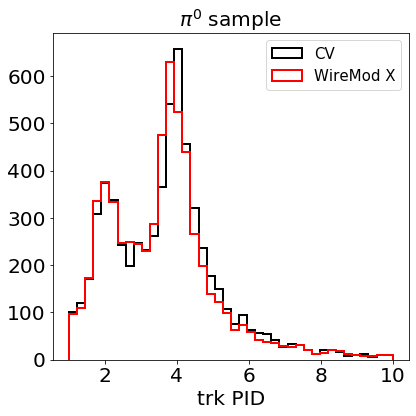

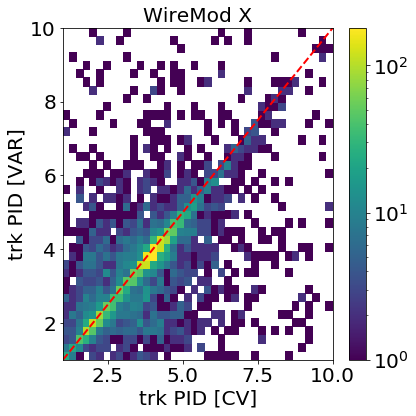

/home/david/miniconda2/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


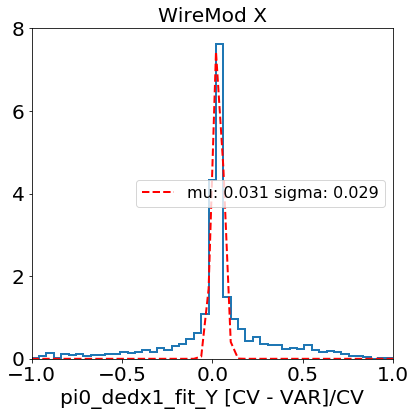

fractional error for var WireMod X : 
  [0.04956659705469746, 0.07647405556883521, 0.015026404289092413, 0.08809292172945697, 0.008916807529792183, 0.011185467623407436, 0.01872845184733096, 0.2626557700969607, 0.006096563376594789, 0.00950652502389512, 0.09581126130666398, 0.2953657614201856, 0.16243579920346338, 0.20486253213656141, 0.03361013105378907, 0.1732904144224538, 0.16360976011870415, 0.207713483379214, 0.1860070944771921, 0.07983297162165875, 0.18669272168118914, 0.22672783474298572, 0.07799530029296875, 0.23975427742533076, 0.32970658740899966, 0.14634146341463414, 0.0253904514845152, 0.21857297995362626, 0.015323531236429058, 0.024599337984902245, 0.0, 0.28150435026662923, 0.0008552229688454491, 0.1875, 0.54608154296875, 0.0, 0.4166666666666667, 0.16666666666666666, 0.0, 0.01875]


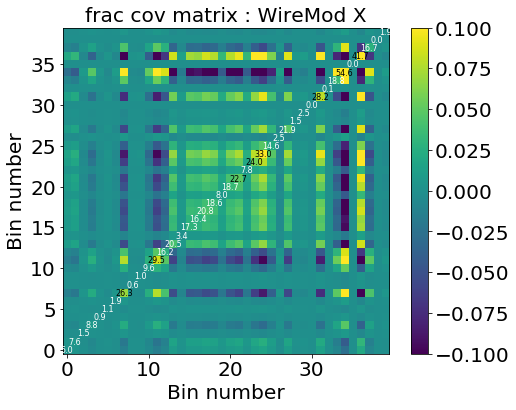

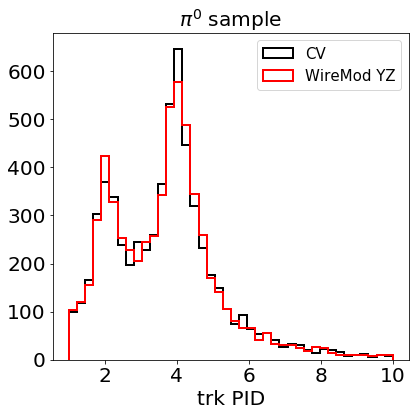

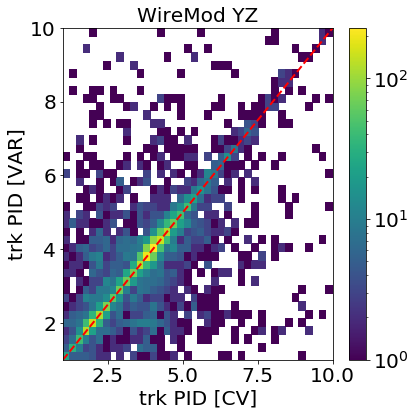

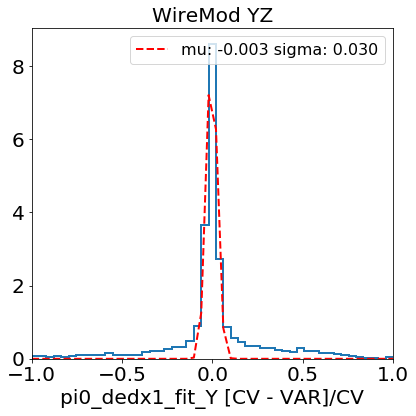

fractional error for var WireMod YZ : 
  [0.05452032921544837, 0.014983940192704815, 0.06638191012659686, 0.04629390798609246, 0.1438549290917854, 0.028949787221723648, 0.056569970409963206, 0.16392607832458445, 0.15973976509681334, 0.07714031794066097, 0.007583936800526663, 0.0621093752612525, 0.012555774094362832, 0.10685522442521568, 0.0963799923537937, 0.07819236096582119, 0.12229263157894738, 0.0359224778320353, 0.04910401080563624, 0.00806071418667209, 0.08115846057961981, 0.2853806533921671, 0.030506310096153847, 0.24460314295553823, 0.008323824182434165, 0.21164014862804878, 0.128053872532471, 0.09835343840803029, 0.19309510515540668, 0.10632724501702664, 0.8571428571428572, 0.15460673154182664, 0.26678069639584606, 0.375, 0.375, 0.09090909090909091, 0.08333333333333333, 0.16666666666666666, 0.1, 0.125]


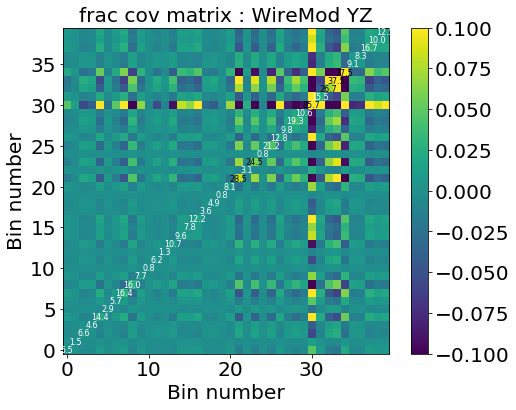

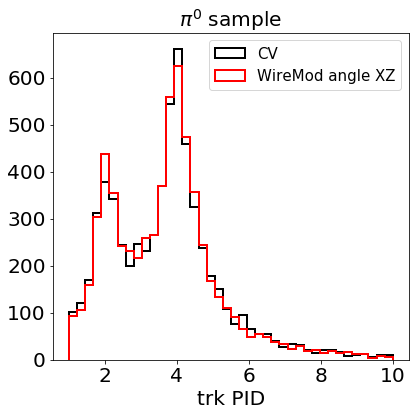

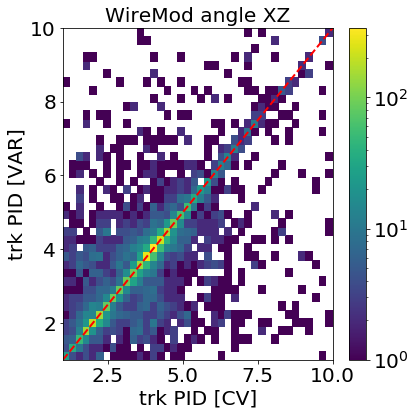

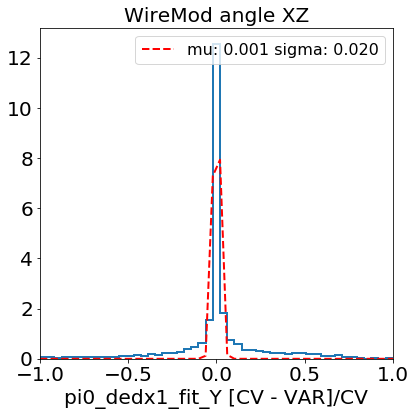

fractional error for var WireMod angle XZ : 
  [0.0908815320283183, 0.13097665251399285, 0.06266630432235143, 0.02962809045383935, 0.15596230653978696, 0.03648195692483241, 0.009914454880361101, 0.16193592782322808, 0.12661241104705248, 0.11187963378691126, 0.0021987857314215062, 0.004223381417518697, 0.025528135103682993, 0.05497097202235497, 0.034435521612548675, 0.09491702255553441, 0.022908423765822264, 0.0617030647724879, 0.11532986976015942, 0.030591415896286753, 0.180708610968734, 0.3038997911464477, 0.24615384615384614, 0.023672206784459707, 0.10461835133437714, 0.06529868521341463, 0.24853858318082478, 0.27868275072642423, 0.047087288293318444, 0.06386778748839092, 0.4260951450892857, 0.31512811356128917, 0.0320097739767868, 0.125, 1.0, 0.18181818181818182, 0.0, 0.5, 0.1, 0.3]


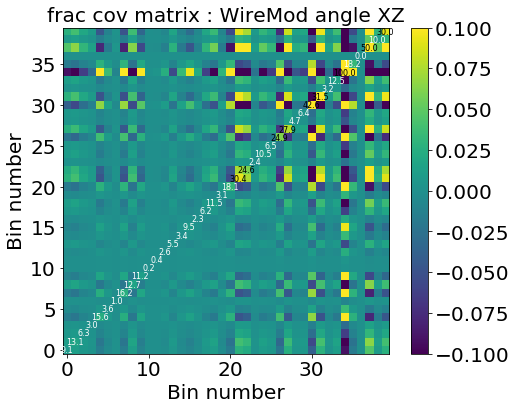

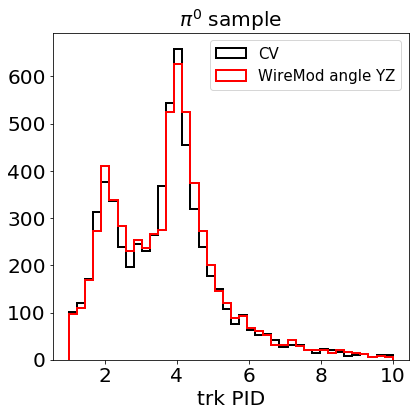

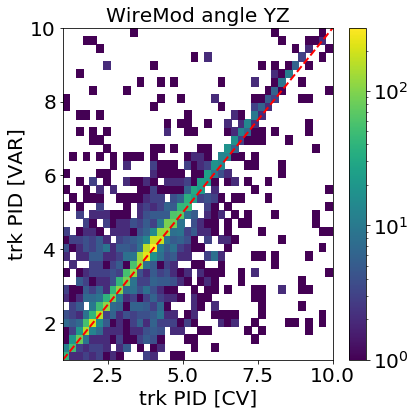

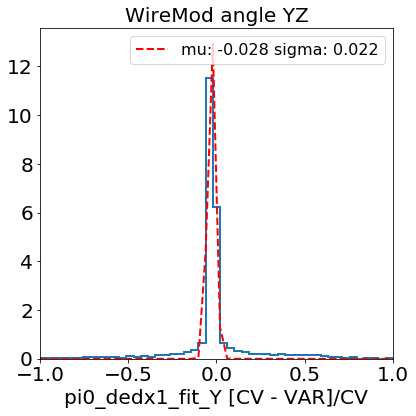

fractional error for var WireMod angle YZ : 
  [0.04691970672219814, 0.09613428831329839, 0.015280450807335684, 0.12357921764411993, 0.08930711962235958, 0.005465932649256981, 0.18358049676883345, 0.17118435768760956, 0.03422580816073144, 0.027446891781099426, 0.006708926165827012, 0.2559262455646443, 0.032913483248107486, 0.04824218713820767, 0.15350954077588774, 0.17287786106349373, 0.14521597084270493, 0.13127625566379544, 0.01878856228649361, 0.10963284857612018, 0.17057919015889286, 0.037322997891038705, 0.0545196533203125, 0.14767207786211609, 0.045714690090137906, 0.24390243902439024, 0.16444270713029263, 0.3095439828123582, 0.0684750915069173, 0.024170695115852642, 0.4138881138392857, 0.08579591107936792, 0.22714722052535125, 0.3125, 1.12286376953125, 0.2727272727272727, 0.045247395833333336, 0.0, 0.2, 0.5]


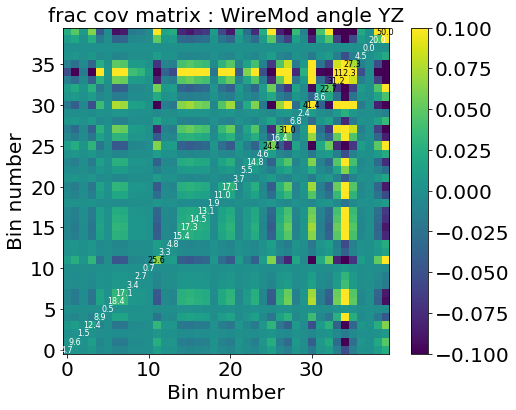

In [32]:
VARIABLE = "pi0_dedx1_fit_Y"
TITLE = 'trk PID'
BINS = np.linspace(1,10,41)
print (BINS)

DIAG_VAL_QUAD_V = [] # quadrature sum
DIAG_VAL_V_V = [] # vector for each variation
for b in range(len(BINS)-1):
    DIAG_VAL_QUAD_V.append(0)

for i,df in enumerate(DETSYS_SAMPLE_V):
    
    DIAG_VAL = []

    dfsub = df
    
    dfsub_CV  = df.query(QUERY_CV)
    dfsub_VAR = df.query(QUERY_VAR)

    idx = i#+6
    
    SCALE = 1.0 #(1.01e21)/POT_V[i]
    
    fig = plt.figure(figsize=(6,6))
    
    n_cv, bins, p = plt.hist(dfsub_CV['%s_CV'%VARIABLE] ,bins=BINS,histtype='step',lw=2,color='k',\
             label='CV',weights=dfsub_CV['weightSplineTimesTune_CV']*SCALE)
    
    n_var, bins, p = plt.hist(dfsub_VAR['%s_VAR'%VARIABLE],bins=BINS,histtype='step',lw=2,color='r',\
             label='%s'%DETVAR_N_V[idx],weights=dfsub_VAR['weightSplineTimesTune_VAR']*SCALE)
    
    bc = 0.5*(bins[1:]+bins[:-1])
    
    cov,frac_cov,corr = COVARIANCE(n_cv,n_var)
    
    error = np.sqrt(np.diag(frac_cov))
    
    plt.xlabel(TITLE)
    #plt.ylabel('Num. Entries',fontsize=16)
    #plt.ylim(0,plt.gca().get_ylim()[1]*1.5)
    plt.legend(fontsize=15,loc="best")
    plt.title(SAMPLE)
    plt.tight_layout()
    plt.show()
    if (SAVEFIG):
        fig.savefig(ls.main_path+"plots/"+VARIABLE+"_"+date_time+"_%s"%DETVAR_N_V[idx]+"_%s"%SELECTION+"_"+SAMPLEDEF+".pdf")
    
    #continue
    
    dfsubcommon = (dfsub.query(QUERY_CV)).query(QUERY_VAR)
    
    fig = plt.figure(figsize=(6,6))
    plt.hist2d(dfsubcommon['%s_CV'%VARIABLE],dfsubcommon['%s_VAR'%VARIABLE],bins=(BINS,BINS),norm=LogNorm())
    plt.xlabel('%s [CV]'%TITLE)
    plt.ylabel('%s [VAR]'%TITLE)
    plt.title('%s'%DETVAR_N_V[idx])
    plt.plot(BINS,BINS,'r--',lw=2)
    plt.colorbar()
    plt.tight_layout()
    if (SAVEFIG):
        fig.savefig(ls.main_path+"plots/"+VARIABLE+"_corr_"+date_time+"_%s"%DETVAR_N_V[idx]+"_%s"%SELECTION+"_"+SAMPLEDEF+".pdf")
    plt.show()
    
    #'''
    BMAX = 1.0
    BINS1D = np.linspace(-BMAX,BMAX,50)
    fig = plt.figure(figsize=(6,6))
    vals = (dfsubcommon['%s_CV'%VARIABLE].values - dfsubcommon['%s_VAR'%VARIABLE].values) / dfsubcommon['%s_CV'%VARIABLE].values
    n,b,p = plt.hist(vals,bins=BINS1D,histtype='step',lw=2,normed=True)
    b = 0.5*(b[1:]+b[:-1])
    guess = [0.,0.05,10.]
    popt,popv = curve_fit(gauss,b[10:-10],n[10:-10],p0=guess)
    pope = np.sqrt(np.diag(popv))
    plt.plot(BINS1D,gauss(BINS1D,*popt),'r--',lw=2,label=r'mu: %.03f sigma: %.03f'%(popt[0],popt[1]))
    plt.xlim([-BMAX,BMAX])
    plt.xlabel('%s [CV - VAR]/CV'%VARIABLE)
    #plt.xlabel('%s [CV]'%TITLE)
    #plt.ylabel('%s [VAR]'%TITLE)
    plt.title('%s'%DETVAR_N_V[idx])
    plt.legend(loc='best',fontsize=16)
    plt.tight_layout()
    #plt.plot(BINS,BINS,'r--',lw=2)
    if (SAVEFIG):
        fig.savefig(ls.main_path+"plots/"+VARIABLE+"_1d_"+date_time+"_%s"%DETVAR_N_V[idx]+"_%s"%SELECTION+"_"+SAMPLEDEF+".pdf")
    plt.show()
    #'''
    #continue
    #print (frac_cov)
            
    fig, ax = plt.subplots(1, 1,figsize=(8,6))
    pos = ax.imshow(frac_cov, origin='lower', cmap='viridis',vmin=-0.1,vmax=0.1)
    ax.set_title("frac cov matrix : %s"%DETVAR_N_V[idx])
    ax.set_ylabel("Bin number")
    ax.set_xlabel("Bin number")
    # Add the text
    # Limits for the extent
    x_start = 0
    x_end = len(n_cv)#-1
    y_start = 0
    y_end = len(n_cv)#-1
    size = len(n_cv)#-1

    x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
    y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

    for x_index, x in enumerate(x_positions):
        #for x_index, x in enumerate(x_positions):
        ERR = frac_cov[x_index, x_index]
        label = "%.01f"%(100.*np.sqrt(ERR))
        text_x = x #+ jump_x
        text_y = x #+ jump_y
        DIAG_VAL.append(np.sqrt(ERR))
        # skip recombination variation
        if (DETVAR_N_V[idx] != 'Recomb'):
            DIAG_VAL_QUAD_V[x_index] += ERR

        if (np.abs(ERR) > 0.05):
            ax.text(text_x, text_y, label, color='black', ha='center', va='center',fontsize=8)
        else:
            ax.text(text_x, text_y, label, color='white', ha='center', va='center',fontsize=8)  
    
    print ('fractional error for var %s : \n '%(DETVAR_N_V[idx]),DIAG_VAL)
    DIAG_VAL_V_V.append(DIAG_VAL)

    
    fig.colorbar(pos)
    if (SAVEFIG):
        fig.savefig(ls.main_path+"plots/"+VARIABLE+"_matrix_"+date_time+"_%s"%DETVAR_N_V[idx]+"_%s"%SELECTION+"_"+SAMPLEDEF+".pdf")
    plt.show()

    '''
    fig, ax = plt.subplots(1, 1)
    ax.set_title("Correlation matrix")
    pos = ax.imshow(corr, origin='lower')
    ax.set_ylabel("Bin number")
    ax.set_xlabel("Bin number")
    fig.colorbar(pos)
    plt.show()
    '''           

In [31]:
DIAG_FRAC_V = []
for d in DIAG_VAL_QUAD_V:
    DIAG_FRAC_V.append(np.sqrt(d))
print ('quadrature sum of errors : ')
print ('frac err: \n',DIAG_FRAC_V)

quadrature sum of errors : 
frac err: 
 [nan, 2.8628643572338035, 0.3730934925516496, 0.0825215378341445, 0.14993802315167196, 0.17492050500573658, 0.15022468682517245, 0.18320004391698236, 0.15603008077853203, 0.45487291776214966, 0.2845423397701524, 0.15147485074787578, 0.24173067197246434, 0.16415200413232933, 0.20954190298843312, 0.13622611370594018, 0.21170753805185086, 0.31653987658752536, 0.2190196209037882, 0.2714503721269858, 0.10222919278947673, 0.13497982487455837, 0.2834036446372187, 0.16054365217666478, 0.21301154390601493, 0.2541638728734796, 0.328663477733182, 0.45965295314257915, 0.7100947639577646, 0.34019617367198857, 0.503463853206184, 0.1516638788920854, 0.1753669165079377, 0.2670712181912379, 0.28273755493155334, 0.07883334649755083, 0.09786621637731631, 0.03325077715623136, 0.02247710617789689, 0.08488531758849213]


In [ ]:
fout = open(ls.main_path+"plots/"+'detsys_'+VARIABLE+"_"+SELECTION+".txt","w")
strout = TITLE + ','
for n in DETVAR_N_V:
    strout += '%s,'%n
strout += 'sum,'
fout.write(strout+'\n')
for b in range(len(BINS)-1):
    bmin = BINS[b]
    bmax = BINS[b+1]
    brange = '%.02f - %.02f'%(bmin,bmax)
    strout = brange+','
    for V_V in DIAG_VAL_V_V:
        strout += '%.04f,'%(V_V[b])
    strout += '%.04f,'%(DIAG_FRAC_V[b])
    fout.write(strout+'\n')

In [ ]:
fig = plt.figure(figsize=(8,6))


bcenter = 0.5*(BINS[:-1]+BINS[1:])

for n,V_V in enumerate(DIAG_VAL_V_V):
    
    if (DETVAR_N_V[n] == "Recomb"):
        continue
    plt.step(bcenter,V_V,where='mid',label=DETVAR_N_V[n],lw=2)
plt.step(bcenter,DIAG_FRAC_V,label='cumulative',color='k',lw=3,where='mid')    
    
plt.legend(loc=1,ncol=2,fontsize=14)

plt.ylim([0,0.5])
plt.xlabel(TITLE)
plt.ylabel('Frac Uncertainty')
plt.tight_layout()
if (SAVEFIG):
    plt.savefig(ls.main_path+"plots/"+"_cumulative_detsys_"+date_time+"_%s"%SELECTION+".pdf")
plt.show()

In [ ]:
DIAG_QUAD_V = np.zeros(len(DIAG_VAL_V[0]))

for DIAG_VAL in DIAG_VAL_V:
    DIAG_QUAD_V += (np.array(DIAG_VAL))**2


    
DIAG_QUAD_V = np.sqrt(DIAG_QUAD_V)
print (100.*DIAG_QUAD_V)

In [ ]:
def Eff(df,var,query,acceptance,bin_edges,absval=False):
    #print acceptance
    bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
    bins = []
    bin_eff = []
    bin_err = []
    for i in range(len(bin_centers)):
        binmin = bin_edges[i]
        binmax = bin_edges[i+1]
        bincut = '%s > %f and %s < %f'%(var,binmin,var,binmax)
        if (absval == True):
            bincut = '(%s > %f and %s < %f) or (%s > -%f and %s < -%f)'%(var,binmin,var,binmax,var,binmax,var,binmin)
        if (acceptance != ''): bincut += ' and %s'%acceptance
        #print bincut
        df_tmp =  df.query(bincut) # cut on bin range for desired var.
        df_sub = df_tmp.query(query) # apply constrain 
        if (df_tmp.shape[0] == 0): continue
        eff = df_sub.shape[0] / float( df_tmp.shape[0] )
        err = np.sqrt( eff*(1-eff)/df_tmp.shape[0] )
        bin_eff.append( eff )
        bin_err.append( err )
        bins.append(bin_centers[i])
        #print 'eff = %.02f @ bin = %.02f'%(eff,bin_centers[i])
    return np.array(bins),np.array(bin_eff),np.array(bin_err)

In [ ]:
# nue slection
ACCEPTANCE_CV = 'isVtxInFiducial_CV == 1 and truthFiducial_CV == 1 and npi0_CV==0 and npion_CV==0 and nproton_CV>0 and selected_CV==1'
ACCEPTANCE_VAR = 'isVtxInFiducial_VAR == 1 and truthFiducial_VAR == 1 and npi0_VAR==0 and npion_VAR==0 and nproton_VAR>0 and selected_VAR==1'

#ACCEPTANCE_CV += ' and shr_bkt_pdg_CV == 11 and shr_bkt_purity_CV > 0.5'
#ACCEPTANCE_VAR += ' and shr_bkt_pdg_VAR == 11 and shr_bkt_purity_VAR > 0.5'

ACCEPTANCE_CV += ' and trk_bkt_pdg_CV == 2212 and trk_bkt_purity_CV > 0.5'
ACCEPTANCE_VAR += ' and trk_bkt_pdg_VAR == 2212 and trk_bkt_purity_VAR > 0.5'

QUERY_CV = NpBoxCutQuery('CV',BDT=False)
QUERY_VAR = NpBoxCutQuery('VAR',BDT=False)

ACCEPTANCE_CV += 'and %s'%QUERY_CV
ACCEPTANCE_VAR += 'and %s'%QUERY_VAR

print (ACCEPTANCE_CV)


# pi0 slection
#ACCEPTANCE_CV = 'isVtxInFiducial_CV == 1 and truthFiducial_CV == 1 and npi0_CV==1'
#ACCEPTANCE_VAR = 'isVtxInFiducial_VAR == 1 and truthFiducial_VAR == 1 and npi0_VAR==1'

# numu slection
#ACCEPTANCE_CV = 'isVtxInFiducial_CV == 1 and truthFiducial_CV == 1 and ccnc_CV == 0'
#ACCEPTANCE_VAR = 'isVtxInFiducial_VAR == 1 and truthFiducial_VAR == 1 and ccnc_VAR == 0'

In [ ]:
#QUERY_CV = 'trkpid_CV < 0.02'
#QUERY_VAR = 'trkpid_VAR < 0.02'

#QUERY_CV = 'shr_tkfit_dedx_max_CV < 3.8'# and shr_tkfit_dedx_max_CV < 3.8'
#QUERY_VAR = 'shr_tkfit_dedx_max_VAR < 3.8'# and shr_tkfit_dedx_max_VAR < 3.8'


QUERY_CV = 'shr_tkfit_nhits_tot_CV > 1 and shr_tkfit_dedx_max_CV > 1.0 and shr_tkfit_dedx_max_CV < 3.8'
QUERY_VAR = 'shr_tkfit_nhits_tot_VAR > 1 and shr_tkfit_dedx_max_VAR > 1.0 and shr_tkfit_dedx_max_VAR < 3.8'

In [ ]:
fig = plt.figure(figsize=(6,6))
dfsub = (DETSYS_SAMPLE_V[0]).query(ACCEPTANCE_CV)
plt.hist(dfsub['shr_tkfit_dedx_max_CV'].values,bins=np.linspace(0,10,51))
plt.show()

In [ ]:
dfsub = (DETSYS_SAMPLE_V[0]).query(ACCEPTANCE_CV)
print (dfsub.shape[0])
dfsub = dfsub.query(QUERY_CV)
print (dfsub.shape[0])

In [ ]:
#BINS = np.linspace(0.105,1.505,15)
#BINS = np.linspace(0.,1.6,17)

BINS = np.linspace(0.1,1.5,15)
#BINS = np.linspace(0.938,1.438,15)


print (BINS)
#BINS = np.array([0.135,0.235,0.335,0.435,0.535,0.735,0.935,1.335])

VARIABLE = 'elec_e'

print (QUERY_CV)
print ('...')
print (ACCEPTANCE_CV)

fig, ax = plt.subplots(1, 1,figsize=(8,6))

for i,df in enumerate(DETSYS_SAMPLE_V):
    
    if (i==0):
        centers,vals,errs = Eff(df,VARIABLE+'_CV',QUERY_CV,ACCEPTANCE_CV,BINS)
        #plt.plot(centers,vals,'ko-',label=r'CV')
        plt.errorbar(centers,vals,xerr=(BINS[1]-BINS[0])/2.,fmt='o-',color='k',label=r'CV')
        
    #if (i > 2):
    #    break
    
    centers,vals,errs = Eff(df,VARIABLE+'_VAR',QUERY_VAR,ACCEPTANCE_VAR,BINS)
    #plt.errorbar(centers,vals,yerr=errs,fmt='o-',label=r'%s'%(DETVAR_N_V[i]))
    plt.plot(centers,vals,'o--',label=r'%s'%(DETVAR_N_V[i]))

plt.ylim([0.,0.7])    
plt.legend(fontsize=16,loc="best")
    #plt.ylim([0,0.1])

plt.ylabel('selection efficiency')
plt.xlabel(r'true electron energy [GeV]')
plt.title(r'$e$/$\gamma$ d$E$/d$x$ cut [1.0, 3.8] MeV/cm')
#plt.xlabel(r'true proton energy [GeV]')
#plt.title(r'track PID cut [LLR-PID < 0.02]')
plt.tight_layout()
fig.savefig(ls.main_path+"plots/"+VARIABLE+"_"+date_time+"_eff_shrpid_nues.pdf")
plt.show()
